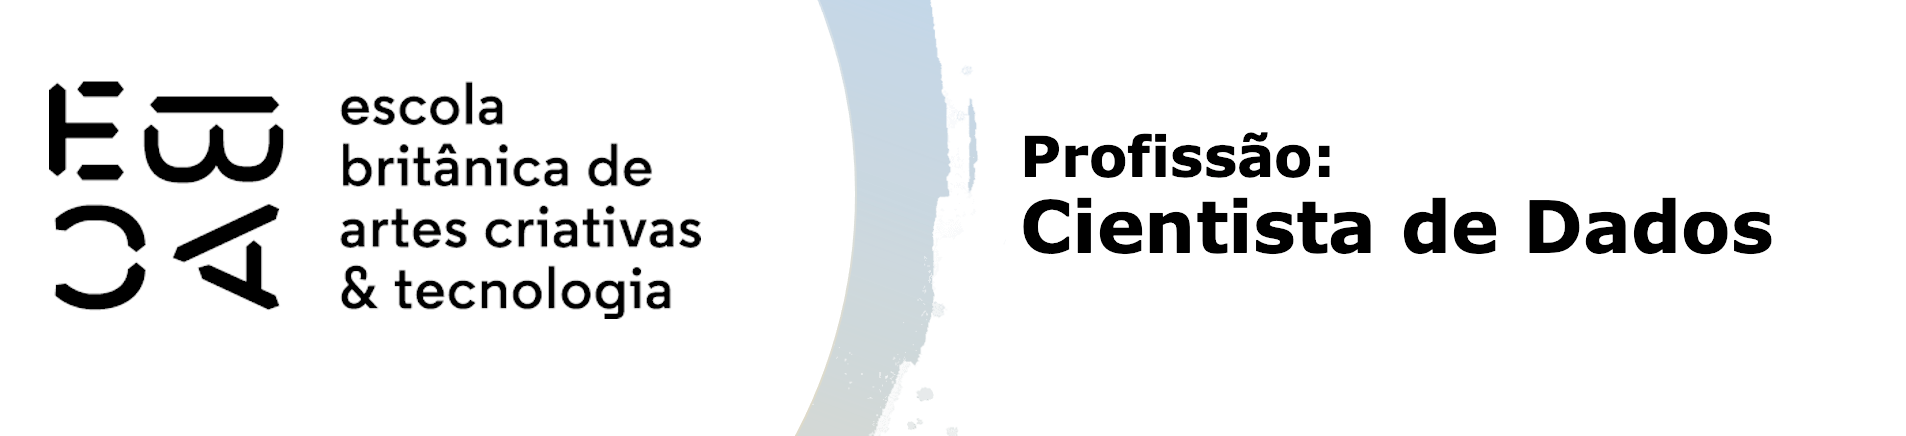

# Métodos hierárquicos de agrupamento - Tarefa

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins

In [3]:
df_peng_raw = sns.load_dataset('penguins')
df_peng = df_peng_raw.select_dtypes('number').copy()
df_peng.shape

(344, 4)

2. Elimine valores faltantes

In [4]:
df_peng.dropna(inplace=True)

3. Padronize as variáveis para média zero e desvio padrão 1

In [5]:
df_peng_pad = pd.DataFrame(StandardScaler().fit_transform(df_peng), columns = df_peng.columns)
df_peng_pad.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,1.662088e-16,1.001465,-2.168526,-0.861570,0.096865,0.839767,2.875868
bill_depth_mm,342.0,-1.412775e-15,1.001465,-2.054446,-0.786635,0.075475,0.785449,2.205397
flipper_length_mm,342.0,-8.310441e-16,1.001465,-2.059320,-0.777373,-0.278838,0.860670,2.142618
body_mass_g,342.0,4.155221e-17,1.001465,-1.875362,-0.813898,-0.189508,0.684638,2.620248


4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos

In [6]:
ac = AgglomerativeClustering(linkage="complete",
                             n_clusters=3)
ac = ac.fit(df_peng_pad)

In [7]:
df_peng['ac_3'] = ac.labels_

5. Faça o Dendrograma

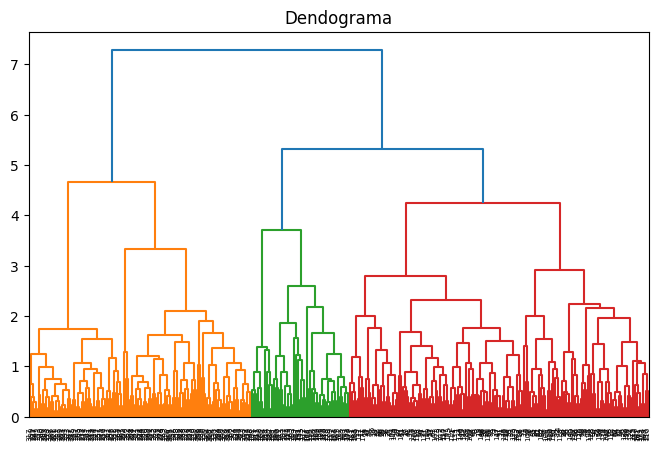

In [8]:
plt.figure(figsize=(8, 5))

plt.title("Dendograma")
shc.dendrogram(shc.linkage(df_peng_pad, method='complete'));

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?

In [9]:
df_peng_group = df_peng_raw.merge(df_peng['ac_3'], how='left', left_index=True, right_index=True)

In [10]:
pd.crosstab(df_peng_group['species'], df_peng_group['ac_3'])

ac_3,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

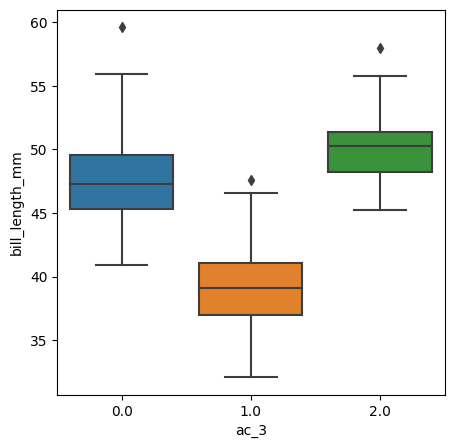

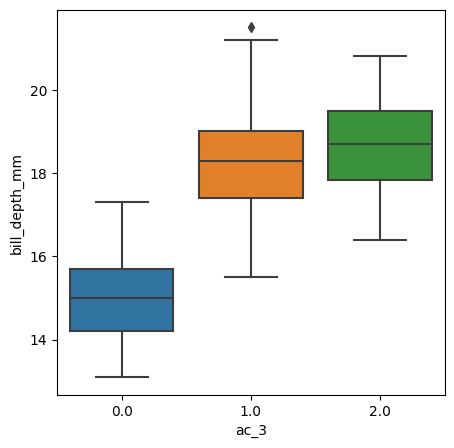

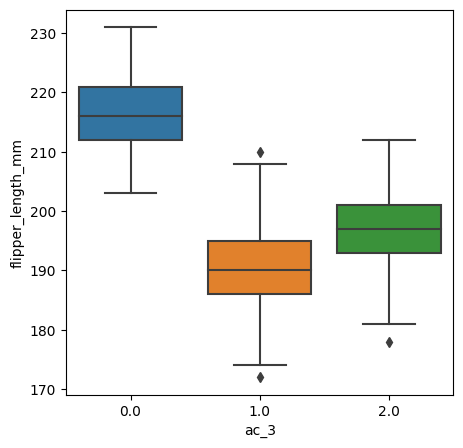

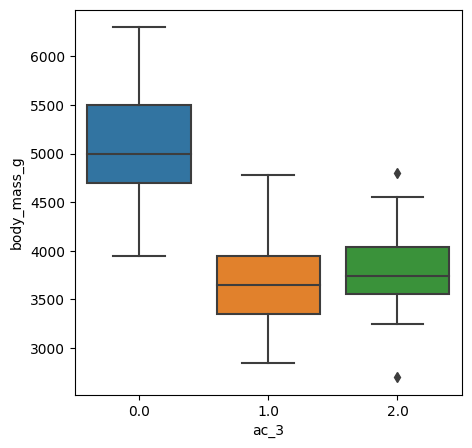

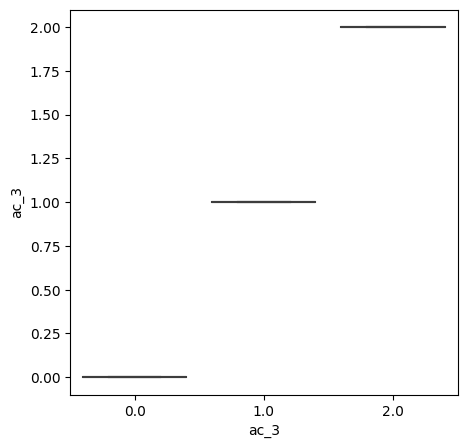

In [30]:
colunas = df_peng_group.select_dtypes('number').columns
for i in colunas:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df_peng_group, y=i, x='ac_3')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.

In [31]:
ac = AgglomerativeClustering(linkage="complete",
                             n_clusters=5)
ac = ac.fit(df_peng_pad)

In [32]:
df_peng['ac_5'] = ac.labels_

- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?

In [33]:
df_peng_group = df_peng_raw.merge(df_peng['ac_5'], how='left', left_index=True, right_index=True)

In [34]:
pd.crosstab(df_peng_group['species'], df_peng_group['ac_5'])

ac_5,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?

In [37]:
pd.crosstab([df_peng_group['species'], df_peng_group['sex']], df_peng_group['ac_5'])

ac_5              0.0  1.0  2.0  3.0  4.0
species   sex                            
Adelie    Female    0    0    4    0   69
          Male      0    0   55    0   18
Chinstrap Female   20    0    9    0    5
          Male     34    0    0    0    0
Gentoo    Female    0    9    0   49    0
          Male      0   61    0    0    0

- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>Podemos ver que, provavelmente pela diferença de tamanho natural, os pinguins foram divididos pela espécie e por genero, por exemplo no Grupo 1 temos os Gentoo machos em sua maioria e no grupo 3 os Gentoo Femeas</p>
</div>